<a href="https://colab.research.google.com/github/stellargr/StatModeling_MSDS22/blob/main/heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4

### Name: Stella Voutsina

In [ ]:
# Importing the libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# defining function for plotting correlation heatmap
def plot_heatmap(correlation, title):
    plt.figure(figsize=(15, 8))
    ax = sns.heatmap(correlation,annot=True,fmt='.2f',linewidths=0.3,annot_kws={"size": 12})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=20)
    ax.figure.axes[-1].tick_params(labelsize=18) # To increase fontsize of colorbar ticks
    #lim = len(correlation.columns)
    #ax.set_ylim([0,lim]) # to make the map display correctly without trimming the edges
    plt.show()
    return

In [ ]:
# Importing the data
dataset = pd.read_csv("classify_imb.csv")
dataset.head(10)

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,Target
0,2.868690,-0.106937,1.065444,0.749917,2.138981,-0.267874,-4.287288,-0.003229,0.102618,-1.594098,...,-0.031744,-1.836612,2.508588,2.123112,-1.599241,0.944821,0.330276,1.017247,-0.440207,0
1,-1.463642,-1.291157,-1.464761,1.287344,-1.994637,0.831797,0.130555,-0.555585,-1.746450,0.320191,...,-0.948864,0.497305,2.651037,1.722998,0.290210,-1.278545,0.488835,1.577497,-1.097335,1
2,-2.208983,1.112905,1.484842,1.455104,-0.380712,-0.465900,3.464477,1.561576,-0.972615,2.646365,...,0.571619,-0.573899,-4.393691,-3.936344,5.499447,0.874778,-0.858103,-1.040617,-2.759917,0
3,1.757493,-0.194035,-1.502209,-1.227620,-1.629453,2.192913,-0.774430,-1.284792,0.433154,2.233775,...,0.089484,-2.290146,-2.274138,-3.454273,-0.904307,0.459121,-0.043155,-2.129675,-0.559314,0
4,-0.621503,-1.709654,-2.155096,-1.982270,-1.205284,-0.285097,-1.279000,-3.831940,-1.205034,-4.213100,...,0.808936,0.647993,4.629954,3.860843,-1.288296,0.992935,1.069965,3.676966,1.005724,0
5,-1.998267,0.759195,1.368263,1.619873,-1.433517,1.956871,3.000505,3.871072,-1.384227,6.913049,...,-0.343300,1.619620,-4.927906,-5.106196,4.799605,-1.401635,1.232087,-2.482734,0.484605,0
6,1.577917,-1.039578,0.018626,0.271940,-0.930173,-0.430565,-0.823309,0.440230,0.159958,0.717908,...,-0.040381,-0.427204,0.290918,-0.122247,-0.112913,-0.455996,-0.991174,-1.257684,-0.820800,1
7,-1.708376,0.079851,3.380842,1.263400,-0.474643,1.589423,-0.167603,3.975252,-0.109659,3.155442,...,1.846039,-0.256466,1.647867,3.442652,0.969155,-1.014498,-0.408346,3.311444,-0.180940,1
8,-1.529698,-1.050573,-1.189928,-0.633985,-0.878990,-1.355385,2.221164,-0.202778,-0.370311,-1.030509,...,-0.194236,-1.276275,0.737942,0.844766,-0.138344,-1.510385,-1.359041,-0.515985,0.885651,1
9,1.700902,0.966012,1.336125,1.046930,2.153326,-1.283668,-2.721901,0.321376,0.662132,-2.395155,...,0.161217,-0.131630,2.597924,3.024930,-1.435329,0.565239,1.621390,1.318915,0.852046,0


In [ ]:
dataset.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'Target'],
      dtype='object')

In [ ]:
dataset.shape

(1000, 21)

The dataset has 21 columns of which 20 columns (A - T) are the features and the last column (Target) is the target. The dataset also has 1000 rows

### Preprocessing the Data

In [ ]:
# Checking for missing values
dataset.isna().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
Q         0
R         0
S         0
T         0
Target    0
dtype: int64

The dataset has no missing values

In [ ]:
# Exploring the feature types
dataset.dtypes

A         float64
B         float64
C         float64
D         float64
E         float64
F         float64
G         float64
H         float64
I         float64
J         float64
K         float64
L         float64
M         float64
N         float64
O         float64
P         float64
Q         float64
R         float64
S         float64
T         float64
Target      int64
dtype: object

All the features are floats and the target is an integer labelled categorical variable

In [ ]:
# Checking the number of categories in the target
dataset["Target"].value_counts()

0    679
1    321
Name: Target, dtype: int64

There are 2 Categories in the target

"0" with 679 occurences <br>
"1" with 321 occurences

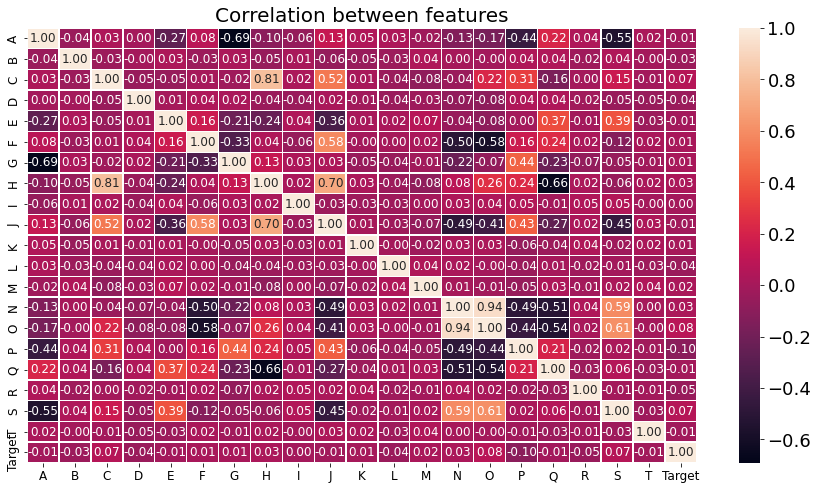

In [ ]:
plot_heatmap(dataset.corr(), 'Correlation between features')

From the correlation heatmap, we can see that most of the features have low correlations with the target (< 0.08)

### Splitting the dataset into Training set and Test set

In [ ]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

### Random Forest Classification Model

In [ ]:
# Building the Model
Rand_Forest_classifier = RandomForestClassifier(n_estimators = 400, random_state = 5)
Rand_Forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=5)

In [ ]:
# Predicting the training set target using the model
y_pred_train = Rand_Forest_classifier.predict(X_train)

In [ ]:
# Predicting the test set target using the model
y_pred = Rand_Forest_classifier.predict(X_test)

#### Evaluating the Random Forest model on the training set

In [ ]:
# Evaluating the Overall performance
accuracy1 = accuracy_score(y_train, y_pred_train)
metric = list(precision_recall_fscore_support(y_train, y_pred_train, average='macro'))
print('The Random Forest Classification model training accuracy is: \t',round(accuracy1 * 100, 2),'%')
print('The Random Forest Classification model training Set Precision: \t', round(metric[0], 2))
print('The Random Forest Classification model training Set Recall: \t', round(metric[1], 2))
print('The Random Forest Classification model training Set F score: \t', round(metric[2], 2))

The Random Forest Classification model training accuracy is: 	 100.0 %
The Random Forest Classification model training Set Precision: 	 1.0
The Random Forest Classification model training Set Recall: 	 1.0
The Random Forest Classification model training Set F score: 	 1.0


In [ ]:
# Evaluating the performance on the different targets
print("Confusion Matrix\n", confusion_matrix(y_train, y_pred_train))
print("\nPrecision, Recall and F1 Score for Targets\n", classification_report(y_train, y_pred_train))

Confusion Matrix
 [[479   0]
 [  0 221]]

Precision, Recall and F1 Score for Targets
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       1.00      1.00      1.00       221

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



#### Evaluating the Random Forest model on the test set

In [ ]:
# Evaluating the Overall performance
accuracy1 = accuracy_score(y_test, y_pred)
metric = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print('The Random Forest Classification model training accuracy is: \t',round(accuracy1 * 100, 2),'%')
print('The Random Forest Classification model training Set Precision: \t', round(metric[0], 2))
print('The Random Forest Classification model training Set Recall: \t', round(metric[1], 2))
print('The Random Forest Classification model training Set F score: \t', round(metric[2], 2))

The Random Forest Classification model training accuracy is: 	 77.67 %
The Random Forest Classification model training Set Precision: 	 0.79
The Random Forest Classification model training Set Recall: 	 0.69
The Random Forest Classification model training Set F score: 	 0.71


In [ ]:
# Evaluating the performance on the different targets
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print("\nPrecision, Recall and F1 Score for Targets\n", classification_report(y_test, y_pred))

Confusion Matrix
 [[190  10]
 [ 57  43]]

Precision, Recall and F1 Score for Targets
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       200
           1       0.81      0.43      0.56       100

    accuracy                           0.78       300
   macro avg       0.79      0.69      0.71       300
weighted avg       0.78      0.78      0.75       300



### Boosting Ensemble Classification Model

In [ ]:
# Building the Model
Grad_boosting_classifier = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=5)
Grad_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300, random_state=5)

In [ ]:
# Predicting the training set target using the model
y_pred_train = Grad_boosting_classifier.predict(X_train)

In [ ]:
# Predicting the test set target using the model
y_pred = Grad_boosting_classifier.predict(X_test)

#### Evaluating the Gradient Boosting model on the training set

In [ ]:
# Evaluating the Overall performance
accuracy1 = accuracy_score(y_train, y_pred_train)
metric = list(precision_recall_fscore_support(y_train, y_pred_train, average='macro'))
print('The Gradient Boosting Classification model training accuracy is: \t',round(accuracy1 * 100, 2),'%')
print('The Gradient Boosting Classification model training Set Precision: \t', round(metric[0], 2))
print('The Gradient Boosting Classification model training Set Recall: \t', round(metric[1], 2))
print('The Gradient Boosting Classification model training Set F score: \t', round(metric[2], 2))

The Gradient Boosting Classification model training accuracy is: 	 100.0 %
The Gradient Boosting Classification model training Set Precision: 	 1.0
The Gradient Boosting Classification model training Set Recall: 	 1.0
The Gradient Boosting Classification model training Set F score: 	 1.0


In [ ]:
# Evaluating the performance on the different targets
print("Confusion Matrix\n", confusion_matrix(y_train, y_pred_train))
print("\nPrecision, Recall and F1 Score for Targets\n", classification_report(y_train, y_pred_train))

Confusion Matrix
 [[479   0]
 [  0 221]]

Precision, Recall and F1 Score for Targets
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       1.00      1.00      1.00       221

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



#### Evaluating the Gradient Boosting model on the test set

In [ ]:
# Evaluating the Overall performance
accuracy1 = accuracy_score(y_test, y_pred)
metric = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print('The Gradient Boosting Classification model training accuracy is: \t',round(accuracy1 * 100, 2),'%')
print('The Gradient Boosting Classification model training Set Precision: \t', round(metric[0], 2))
print('The Gradient Boosting Classification model training Set Recall: \t', round(metric[1], 2))
print('The Gradient Boosting Classification model training Set F score: \t', round(metric[2], 2))

The Gradient Boosting Classification model training accuracy is: 	 75.67 %
The Gradient Boosting Classification model training Set Precision: 	 0.74
The Gradient Boosting Classification model training Set Recall: 	 0.68
The Gradient Boosting Classification model training Set F score: 	 0.69


In [ ]:
# Evaluating the performance on the different targets
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print("\nPrecision, Recall and F1 Score for Targets\n", classification_report(y_test, y_pred))

Confusion Matrix
 [[181  19]
 [ 54  46]]

Precision, Recall and F1 Score for Targets
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       200
           1       0.71      0.46      0.56       100

    accuracy                           0.76       300
   macro avg       0.74      0.68      0.69       300
weighted avg       0.75      0.76      0.74       300



### Logistic Regression Classification Model

In [ ]:
# Building the Model
Log_reg_classifier = LogisticRegression(random_state = 5)
Log_reg_classifier.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [ ]:
# Predicting the training set target using the model
y_pred_train = Log_reg_classifier.predict(X_train)

In [ ]:
# Predicting the test set target using the model
y_pred = Log_reg_classifier.predict(X_test)

#### Evaluating the Logistic Regression model on the training set

In [ ]:
# Evaluating the Overall performance
accuracy1 = accuracy_score(y_train, y_pred_train)
metric = list(precision_recall_fscore_support(y_train, y_pred_train, average='macro'))
print('The Logistic Regression Classification model training accuracy is: \t',round(accuracy1 * 100, 2),'%')
print('The Logistic Regression Classification model training Set Precision: \t', round(metric[0], 2))
print('The Logistic Regression Classification model training Set Recall: \t', round(metric[1], 2))
print('The Logistic Regression Classification model training Set F score: \t', round(metric[2], 2))

The Logistic Regression Classification model training accuracy is: 	 71.14 %
The Logistic Regression Classification model training Set Precision: 	 0.72
The Logistic Regression Classification model training Set Recall: 	 0.56
The Logistic Regression Classification model training Set F score: 	 0.53


In [ ]:
# Evaluating the performance on the different targets
print("Confusion Matrix\n", confusion_matrix(y_train, y_pred_train))
print("\nPrecision, Recall and F1 Score for Targets\n", classification_report(y_train, y_pred_train))

Confusion Matrix
 [[467  12]
 [190  31]]

Precision, Recall and F1 Score for Targets
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       479
           1       0.72      0.14      0.23       221

    accuracy                           0.71       700
   macro avg       0.72      0.56      0.53       700
weighted avg       0.71      0.71      0.64       700



#### Evaluating the Logistic Regression model on the test set

In [ ]:
# Evaluating the Overall performance
accuracy1 = accuracy_score(y_test, y_pred)
metric = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print('The Logistic Regression Classification model training accuracy is: \t',round(accuracy1 * 100, 2),'%')
print('The Logistic Regression Classification model training Set Precision: \t', round(metric[0], 2))
print('The Logistic Regression Classification model training Set Recall: \t', round(metric[1], 2))
print('The Logistic Regression Classification model training Set F score: \t', round(metric[2], 2))

The Logistic Regression Classification model training accuracy is: 	 68.33 %
The Logistic Regression Classification model training Set Precision: 	 0.67
The Logistic Regression Classification model training Set Recall: 	 0.54
The Logistic Regression Classification model training Set F score: 	 0.5


In [ ]:
# Evaluating the performance on the different targets
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print("\nPrecision, Recall and F1 Score for Targets\n", classification_report(y_test, y_pred))

Confusion Matrix
 [[194   6]
 [ 89  11]]

Precision, Recall and F1 Score for Targets
               precision    recall  f1-score   support

           0       0.69      0.97      0.80       200
           1       0.65      0.11      0.19       100

    accuracy                           0.68       300
   macro avg       0.67      0.54      0.50       300
weighted avg       0.67      0.68      0.60       300



### Conclusion / Comments

**Model Performance**

***Training Set***

| Model  | Accuracy | Precision | Recall | F-Score |
| --- | --- | --- | --- | --- |
|  Random Forest  | **100.00** | **1.00** | **1.00** | **1.00** |
|  Gradient Boosting  | **100.00** | **1.00** | **1.00** | **1.00** |
|  Logistic Regression  | 71.14 | 0.72 | 0.56 | 0.53 |


***Test Set***

| Model  | Accuracy | Precision | Recall | F-Score |
| --- | --- | --- | --- | --- |
|  Random Forest  | **77.67** | **0.79** | **0.69** | **0.71** |
|  Gradient Boosting  | 75.67 | 0.74 | 0.68 | 0.69 |
|  Logistic Regression  | 68.33 | 0.67 | 0.54 | 0.5 |



<br>
<br>

From the model performance tables above, Random Forest and Gradient Boosting had the best performance on the training set with Accuracy: **100** , Precision: **1.0**, Recall: **1.0** and F1-Score: **1.0**. Logistic Regression did not perform nearly as well as the other models with an F1-Score of **0.53**.

On the test set, the best performing model was Random Forest with **77.67%** Accuracy, **0.79** Precision, **0.69** Recall and **0.71** F1-Score.

Evaluating the models more closely,although the Logistic Regression model had the least training and test set performance metrics, it had the lowest generalization error. The Random Forest and Gradient Boosting models seemd to overfit the training set which resulted in a much higher generalization error (error between training performance and testing performance).

Investigating further using the per class precision, recall and F-score, all the three models had very low recalls on **Target 1** and the confusion matrix shows that there were lots of False Negatives (i.e. models predicted **Target 1** as negative wheras it is positive).

Precision, Recall and F-Score are very good model evaluation metrics because they give insight to how the model performs on the different classes. They are highly important for imbalanced datasets as accuracy may be misleading.

On This dataset, **Random Forest Classifier** performed best considering the performance metrics (Accuracy, Precicion, Recall and F-Score) but the model can be improved upon by reducing the depth of the tree in a bid to reduce the generalization error.